In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Dataset/project home credit/application_encoded.csv')
print(df.shape)

(307511, 44)


In [4]:
df = df.drop(columns=['NAME_EDUCATION_TYPE'])

In [5]:
df.columns = df.columns.str.replace('[, /]', '_', regex=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   TARGET                                   307511 non-null  int64  
 1   CNT_CHILDREN                             307511 non-null  int64  
 2   AMT_INCOME_TOTAL                         307511 non-null  float64
 3   AMT_CREDIT                               307511 non-null  float64
 4   AMT_ANNUITY                              307511 non-null  float64
 5   AMT_GOODS_PRICE                          307511 non-null  float64
 6   CONTRACT_Cash_loans                      307511 non-null  bool   
 7   CONTRACT_Revolving_loans                 307511 non-null  bool   
 8   CODE_GENDER_F                            307511 non-null  bool   
 9   CODE_GENDER_M                            307511 non-null  bool   
 10  CODE_GENDER_XNA                 

# pisahkan fitur dan label

In [7]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# split data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# kolom numerik
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi scaler
scaler = StandardScaler()

# Fit hanya ke X_train, 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# **Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[32776 23762]
 [ 1897  3068]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72     56538
           1       0.11      0.62      0.19      4965

    accuracy                           0.58     61503
   macro avg       0.53      0.60      0.46     61503
weighted avg       0.88      0.58      0.68     61503



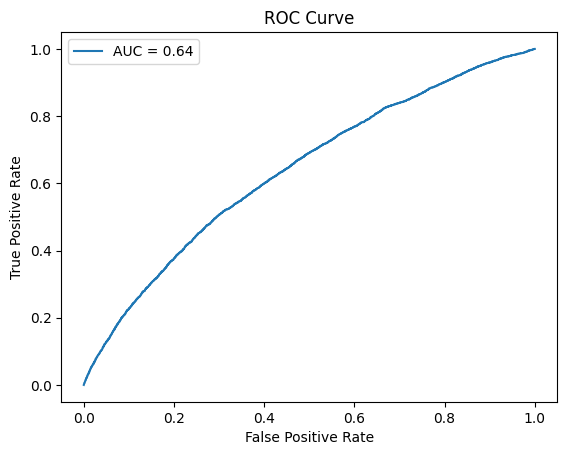

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **Other Model**

In [13]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


# **evaluating**


🔍 Evaluasi: Random Forest
Confusion Matrix:
[[55906   632]
 [ 4861   104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56538
           1       0.14      0.02      0.04      4965

    accuracy                           0.91     61503
   macro avg       0.53      0.50      0.49     61503
weighted avg       0.86      0.91      0.88     61503

AUC: 0.5942

🔍 Evaluasi: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:28:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[37995 18543]
 [ 2132  2833]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     56538
           1       0.13      0.57      0.22      4965

    accuracy                           0.66     61503
   macro avg       0.54      0.62      0.50     61503
weighted avg       0.88      0.66      0.74     61503

AUC: 0.6641

🔍 Evaluasi: LightGBM
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Confus

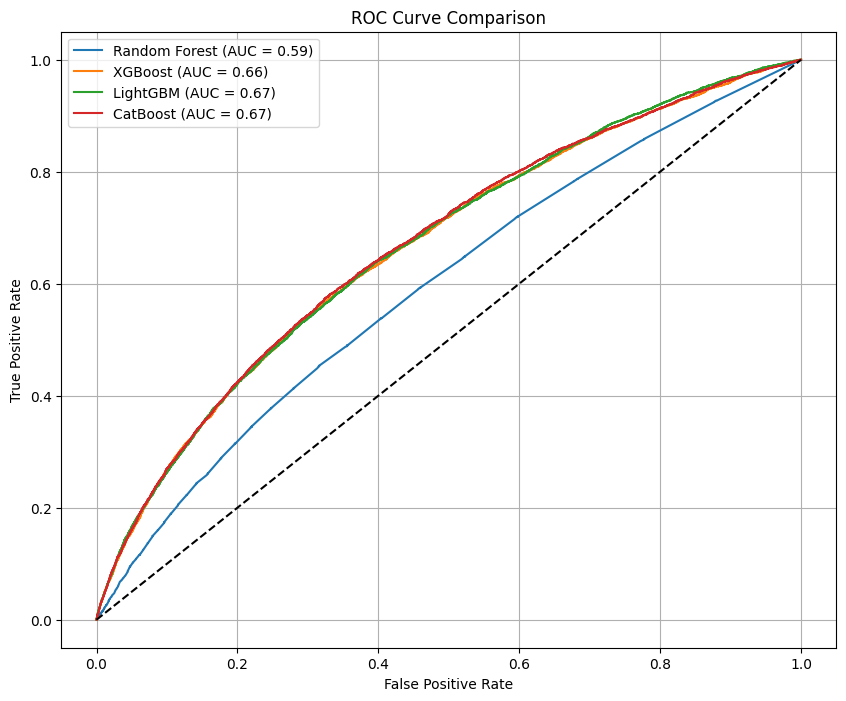

In [14]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=np.bincount(y_train)[0] / np.bincount(y_train)[1],
                              use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(is_unbalance=True, random_state=42),
    "CatBoost": CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=42)
}

# Evaluasi semua model
plt.figure(figsize=(10, 8))
for name, model in models.items():
    print(f"\n🔍 Evaluasi: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

# Plot ROC Curve semua model
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


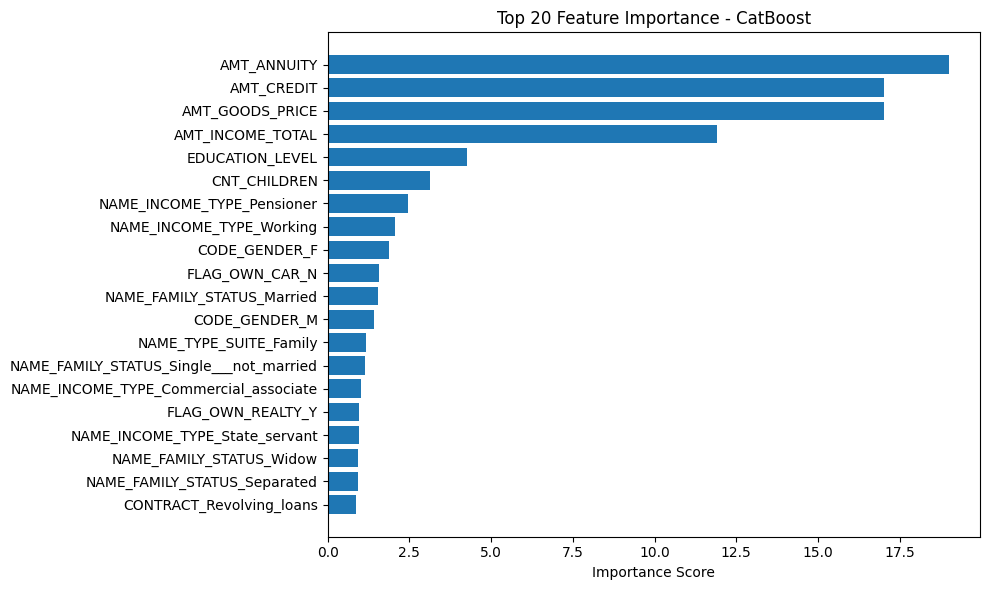

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Setelah model dilatih
feature_importance = model.get_feature_importance()
feature_names = model.feature_names_

# Gabungkan dan urutkan
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot 20 fitur teratas
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
plt.xlabel("Importance Score")
plt.title("Top 20 Feature Importance - CatBoost")
plt.tight_layout()
plt.show()


# **tuning catboost**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Feature Ratio
for df in [X_train, X_test]:
    df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / (df['AMT_INCOME_TOTAL'] + 1)
    df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / (df['AMT_INCOME_TOTAL'] + 1)
    df['GOODS_CREDIT_RATIO'] = df['AMT_GOODS_PRICE'] / (df['AMT_CREDIT'] + 1)

# Class Ratio
neg, pos = np.bincount(y_train)
weight_ratio = neg / pos

# Re Initiate
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    class_weights=[1, weight_ratio * 2],
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]




In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Tentukan threshold
threshold = 0.7
y_pred = (y_proba > threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix (Threshold = {threshold}):")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix (Threshold = 0.7):
[[42527 14011]
 [ 2551  2414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84     56538
           1       0.15      0.49      0.23      4965

    accuracy                           0.73     61503
   macro avg       0.55      0.62      0.53     61503
weighted avg       0.88      0.73      0.79     61503



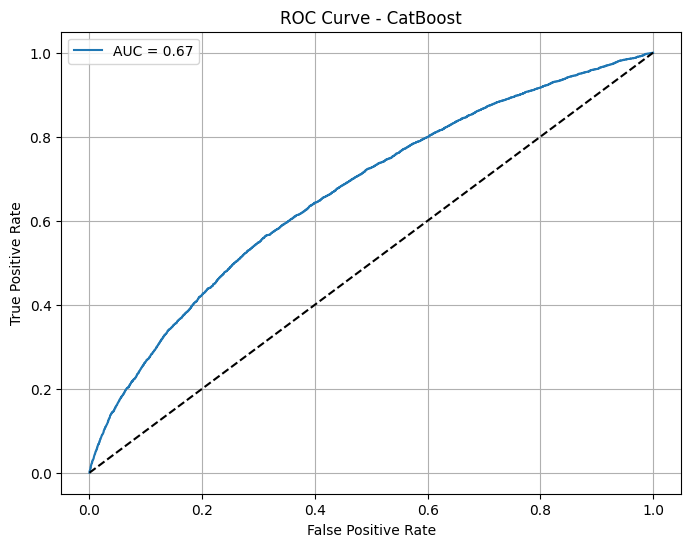

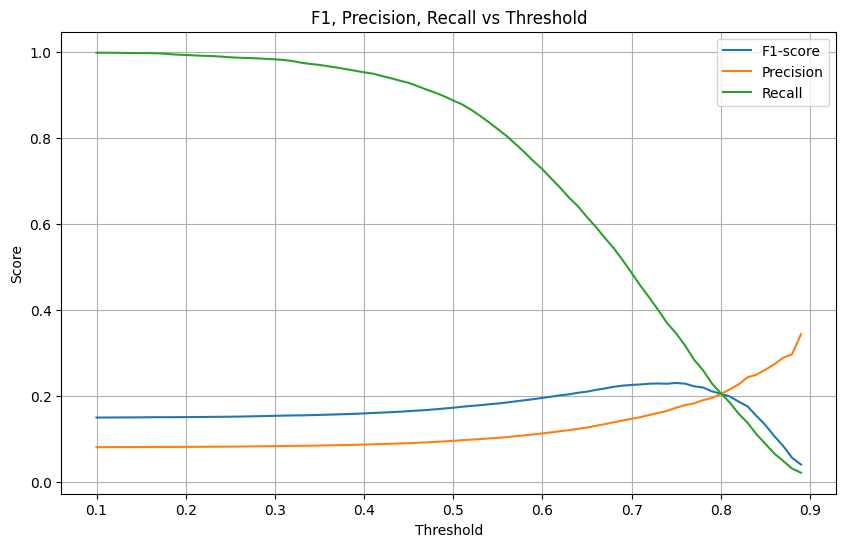

In [24]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend()
plt.grid(True)
plt.show()

# F1, Precision, Recall vs Threshold
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, y_proba > t) for t in thresholds]
precisions = [precision_score(y_test, y_proba > t) for t in thresholds]
recalls = [recall_score(y_test, y_proba > t) for t in thresholds]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label="F1-score")
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("F1, Precision, Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()